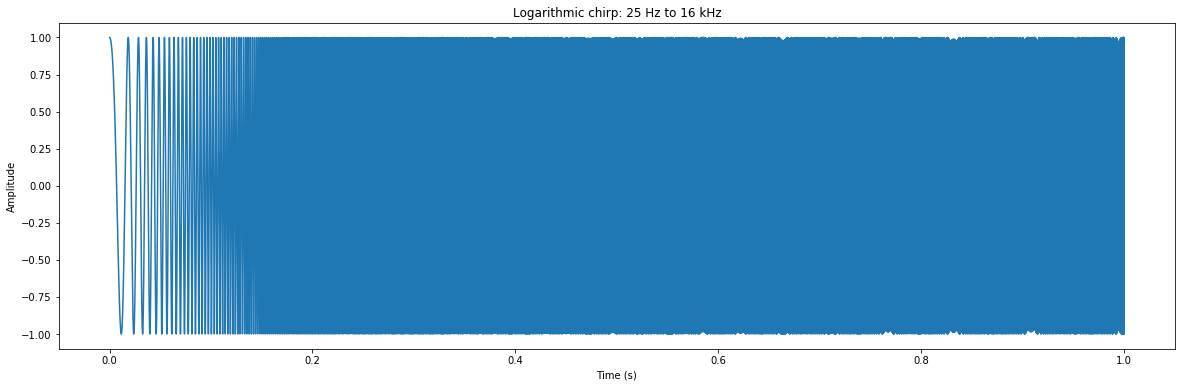

In [314]:
%matplotlib inline

import scipy
from scipy import signal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

xs = np.linspace(0, 1, 32000)
ys = scipy.signal.chirp(xs, 25, 1, 3200, method='linear')


f = plt.figure(figsize=(20, 6))
ax = f.add_subplot(1, 1, 1,
                   title='Logarithmic chirp: 25 Hz to 16 kHz',
                   xlabel='Time (s)', ylabel='Amplitude')
ax.plot(xs, ys)

import IPython.display

IPython.display.Audio(ys, rate=32000)


In [315]:
fs = 32000
fs_nyquist = fs // 2


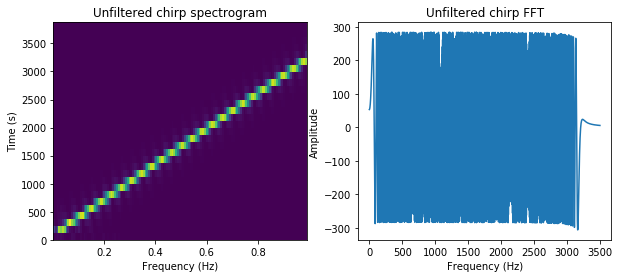

In [316]:

fig = plt.figure(figsize=(10, 4))

f, t, spec = scipy.signal.spectrogram(ys, fs)
ax = fig.add_subplot(1, 2, 1,
                    title='Unfiltered chirp spectrogram',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 2, 2,
                    title='Unfiltered chirp FFT',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.fft(ys)
f = np.fft.rfftfreq(n, 1/fs)
ax.plot(f[:plotn], sp.real[:plotn])

None

order: 5
fs: 32000 nyquist: 16000
fstop1: 0.01875 fstop2: 0.05

bs: [ 2.44102698e-07  0.00000000e+00 -1.22051349e-06  0.00000000e+00
  2.44102698e-06  0.00000000e+00 -2.44102698e-06  0.00000000e+00
  1.22051349e-06  0.00000000e+00 -2.44102698e-07]
as: [   1.           -9.6375413    41.84463705 -107.7864613   182.41167684
 -211.92355356  171.17439495  -94.91564026   34.57827057   -7.47348907
    0.72770607]

SOS: [[ 2.44102698e-07  4.88205396e-07  2.44102698e-07  1.00000000e+00
  -1.88447947e+00  9.01169360e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.89752740e+00  9.06347169e-01]
 [ 1.00000000e+00  0.00000000e+00 -1.00000000e+00  1.00000000e+00
  -1.94186971e+00  9.46611346e-01]
 [ 1.00000000e+00 -2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.93408552e+00  9.57339667e-01]
 [ 1.00000000e+00 -2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.97957920e+00  9.83144237e-01]]

30 coefficients


/home/zack/src/filter-benchmarks/filter-env/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


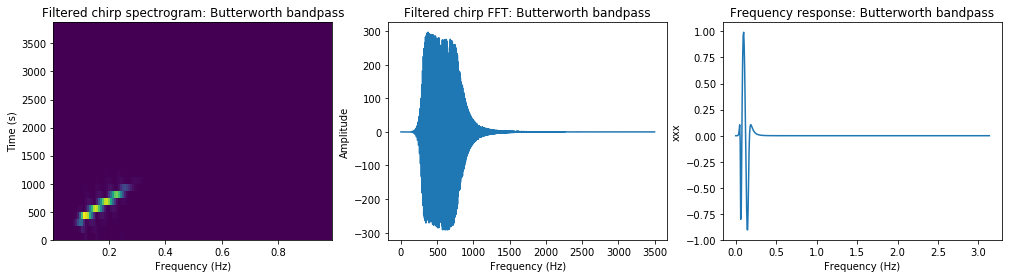

In [325]:
N = 5
fstop1 = 300 / fs_nyquist
fstop2 = 800 / fs_nyquist
print('order:', N)
print('fs:', fs, 'nyquist:', fs_nyquist)
print('fstop1:', fstop1, 'fstop2:', fstop2)
print()

b, a = scipy.signal.butter(N, (fstop1, fstop2), btype='bandpass', analog=False, output='ba')
sos = scipy.signal.butter(N, (fstop1, fstop2), btype='bandpass', analog=False, output='sos')
print('bs:', b)
print('as:', a)
print()
print('SOS:', sos)
print()
print(sum(len(a) for a in sos), 'coefficients')


ys_butter = scipy.signal.sosfilt(sos, ys)

fig = plt.figure(figsize=(17, 4))

f, t, spec = scipy.signal.spectrogram(ys_butter, fs)
ax = fig.add_subplot(1, 3, 1,
                    title='Filtered chirp spectrogram: Butterworth bandpass',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
#ax.pcolormesh(t, f, spec)
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 3, 2,
                    title='Filtered chirp FFT: Butterworth bandpass',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.fft(ys_butter)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])


ax = fig.add_subplot(1, 3, 3,
                    title='Frequency response: Butterworth bandpass',
                    xlabel='Frequency (Hz)', ylabel='xxx')
signal.freqz(b, a, plot=ax.plot)
None



/home/zack/src/filter-benchmarks/filter-env/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


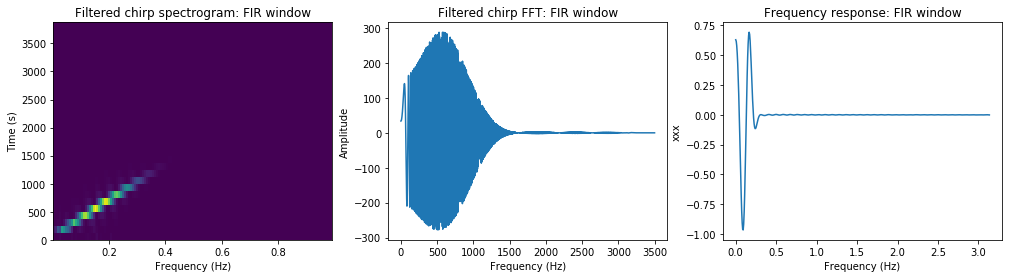

In [318]:
from scipy import signal

N = 73
hs = signal.firwin(N, (300, 800), pass_zero=False, fs=fs)
ys_firwin = signal.lfilter(hs, 1.0, ys)


fig = plt.figure(figsize=(17, 4))

f, t, spec = scipy.signal.spectrogram(ys_firwin, fs)
ax = fig.add_subplot(1, 3, 1,
                    title='Filtered chirp spectrogram: FIR window',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
#ax.pcolormesh(t, f, spec)
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 3, 2,
                    title='Filtered chirp FFT: FIR window',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.fft(ys_firwin)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])


ax = fig.add_subplot(1, 3, 3,
                    title='Frequency response: FIR window',
                    xlabel='Frequency (Hz)', ylabel='xxx')
signal.freqz(hs, plot=ax.plot)
None

/home/zack/src/filter-benchmarks/filter-env/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


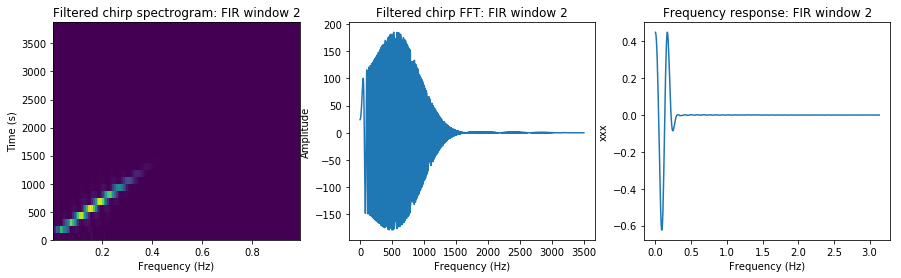

In [319]:
from scipy import signal

nyquist = fs_nyquist
N = 73

fstop1 = 300
fstop2 = 800
hs = signal.firwin2(N, (0.0, fstop1-100, fstop1, fstop2, fstop2+100, nyquist), (0.0, 0.0, 1.0, 1.0, 0.0, 0.0), fs=fs)
ys_firwin2 = signal.lfilter(hs, 1.0, ys)


fig = plt.figure(figsize=(15, 4))

f, t, spec = scipy.signal.spectrogram(ys_firwin2, fs)
ax = fig.add_subplot(1, 3, 1,
                    title='Filtered chirp spectrogram: FIR window 2',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
#ax.pcolormesh(t, f, spec)
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 3, 2,
                    title='Filtered chirp FFT: FIR window 2',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.fft(ys_firwin2)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])


ax = fig.add_subplot(1, 3, 3,
                    title='Frequency response: FIR window 2',
                    xlabel='Frequency (Hz)', ylabel='xxx')
signal.freqz(hs, plot=ax.plot)
None

/home/zack/src/filter-benchmarks/filter-env/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


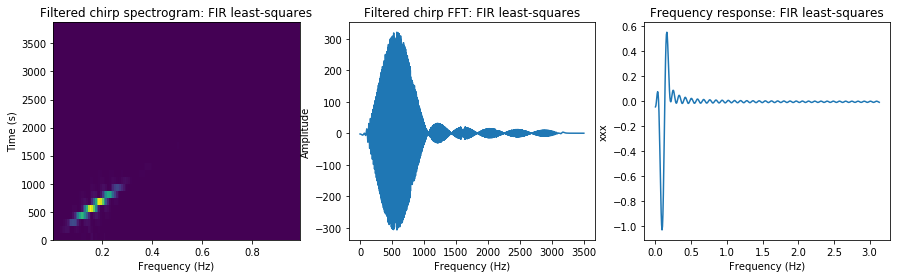

In [320]:
from scipy import signal

N = 73

hs = signal.firls(N, (0.0, fstop1-100, fstop1, fstop2, fstop2+100, nyquist), (0.0, 0.0, 1.0, 1.0, 0.0, 0.0), fs=fs)

ys_firls = signal.lfilter(hs, 1.0, ys)


fig = plt.figure(figsize=(15, 4))

f, t, spec = scipy.signal.spectrogram(ys_firls, fs)
ax = fig.add_subplot(1, 3, 1,
                    title='Filtered chirp spectrogram: FIR least-squares',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
#ax.pcolormesh(t, f, spec)
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 3, 2,
                    title='Filtered chirp FFT: FIR least-squares',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.fft(ys_firls)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])


ax = fig.add_subplot(1, 3, 3,
                    title='Frequency response: FIR least-squares',
                    xlabel='Frequency (Hz)', ylabel='xxx')
signal.freqz(hs, plot=ax.plot)
None

/home/zack/src/filter-benchmarks/filter-env/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


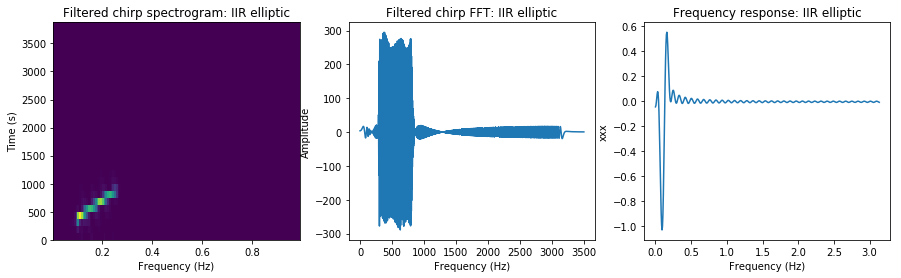

In [324]:
from scipy import signal

fpass1 = 300 / nyquist
fpass2 = 800 / nyquist
fstop1 = 200 / nyquist
fstop2 = 900 / nyquist
b, a = signal.iirdesign((fpass1, fpass2), (fstop1, fstop2), 1, 23, ftype='ellip')

ys_iirellip = signal.lfilter(b, a, ys)


fig = plt.figure(figsize=(15, 4))

f, t, spec = scipy.signal.spectrogram(ys_iirellip, fs)
ax = fig.add_subplot(1, 3, 1,
                    title='Filtered chirp spectrogram: IIR elliptic',
                    xlabel='Frequency (Hz)', ylabel='Time (s)')
#ax.pcolormesh(t, f, spec)
ax.pcolormesh(t, f[:32], spec[:32])


ax = fig.add_subplot(1, 3, 2,
                    title='Filtered chirp FFT: IIR elliptic',
                    xlabel='Frequency (Hz)', ylabel='Amplitude')
sp = np.fft.fft(ys_iirellip)
f = np.fft.rfftfreq(n, 1/fs)
#ax.plot(np.arange(plotn), sp.real[:plotn])
ax.plot(f[:plotn], sp.real[:plotn])


ax = fig.add_subplot(1, 3, 3,
                    title='Frequency response: IIR elliptic',
                    xlabel='Frequency (Hz)', ylabel='xxx')
signal.freqz(hs, plot=ax.plot)
None